In [1]:
from peak_warming_calculator import *

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Checking Function is Working

In [3]:
# default setting
peak_warming_calculator()

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:176: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


2.071184924954215

In [4]:
# return all of other outputs under default settings
peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(return_all_output=True)

In [5]:
peak_T

2.071184924954215

In [6]:
start_year = 1750
last_historical_year = 2019
end_year = 2500
first_perturbed_year = last_historical_year
last_perturbed_year = 2100
years = np.arange(start_year, end_year + 1)
years_forecasted = np.arange(last_historical_year, end_year+1)

24.242778841932854

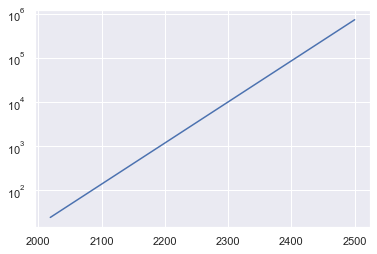

In [7]:
plt.plot(years_forecasted, SCC_forecasted)
plt.yscale("log")
SCC_forecasted[0]

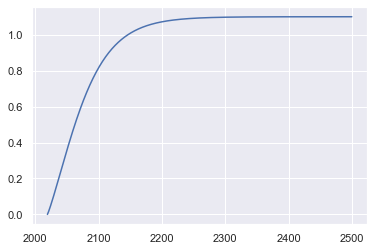

In [8]:
plt.plot(years_forecasted, forecasted_abatement)

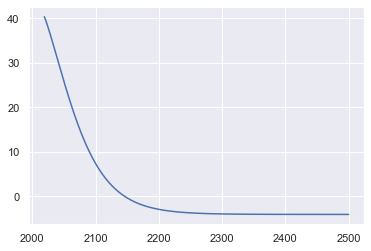

In [9]:
plt.plot(years_forecasted, forecasted_emissions)

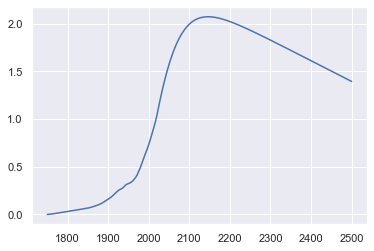

In [10]:
plt.plot(years, T_complete)

## Sensitivity Analysis

In [11]:
Am_array = np.arange(1, 1.5, 0.1)
s_array = np.arange(15, 19, 1)

In [12]:
peak_T_list = []
Am_list = []
s_list = []
for i in range(len(Am_array)):
    print(i)
    for j in range(len(s_array)):
        peak_T_list.append(peak_warming_calculator(Am=Am_array[i], s=s_array[j]))
        Am_list.append(Am_array[i])
        s_list.append(s_array[j])

0


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:176: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


1
2
3
4


In [13]:
df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list)),
               columns =['Am', 's', 'peak_T'])

In [14]:
df

,Am,s,peak_T
0,1.0,15,2.200872
1,1.0,16,2.219268
2,1.0,17,2.238354
3,1.0,18,2.258081
4,1.1,15,2.054261
5,1.1,16,2.059156
6,1.1,17,2.064807
7,1.1,18,2.071185
8,1.2,15,1.994072
9,1.2,16,1.991395


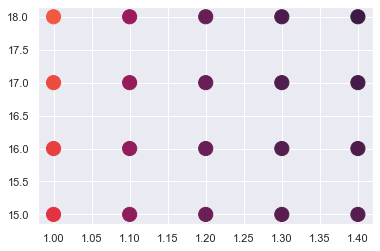

In [15]:
plt.scatter(df.Am, df.s, s=200, c=df.peak_T, vmin=1.8, vmax=2.5)  # , cmap='gray'

In [16]:
def varying_r_Ph_all_outputs(r, P_h):
    Am_array = np.arange(1, 1.5, 0.1)
    s_array = np.arange(15, 19, 1)
    
    peak_T_list = []
    SCC_forecasted_list = [] 
    forecasted_abatement_list = []
    forecasted_emissions_list = []
    T_complete_list = []
    
    Am_list = []
    s_list = []
    for i in range(len(Am_array)):
        for j in range(len(s_array)):
            peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(Am=Am_array[i], s=s_array[j], r=r, P_h=P_h, return_all_output=True)
            peak_T_list.append(peak_T)
            SCC_forecasted_list.append(SCC_forecasted)
            forecasted_abatement_list.append(forecasted_abatement)
            forecasted_emissions_list.append(forecasted_emissions)
            T_complete_list.append(T_complete)
            
            Am_list.append(Am_array[i])
            s_list.append(s_array[j])
    df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list, SCC_forecasted_list, forecasted_abatement_list, forecasted_emissions_list, T_complete_list)),
               columns =['Am', 's', 'peak_T', 'SCC_forecasted', 'forecasted_abatement', 'forecasted_emissions', 'T_complete'])
    return df

In [17]:
df_test = varying_r_Ph_all_outputs(r=20, P_h=30)

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:176: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


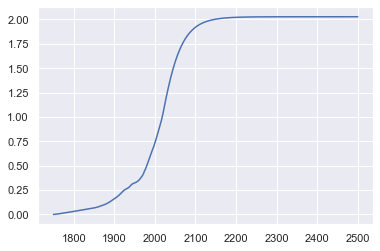

In [18]:
plt.plot(years, df_test['T_complete'][0])

In [19]:
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

df_dict = {}
keys = []
r_array = np.arange(20, 27, 3)
P_h_array = np.arange(40, 120, 20)
for i in range(len(r_array)):
    keys_const_r = []
    for j in range(len(P_h_array)):
        text = str(r_array[i]) + ',' + str(P_h_array[j])
        df_dict[text] = varying_r_Ph_all_outputs(r=r_array[i], P_h=P_h_array[j])
        keys_const_r.append(text)
    keys.append(keys_const_r)
    
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(current_time)

NameError: name 'time' is not defined

In [ ]:
r_length = len(r_array)

P_h_length = len(P_h_array)

fig, axs = plt.subplots(P_h_length, r_length)
cm = plt.cm.get_cmap('RdYlBu')
for i in range(r_length):
    print(i)
    key = keys[i]
    for j in range(P_h_length):
        ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='A$_{m}$', ylabel='s')
for ax in axs.flat:
    ax.label_outer()


In [ ]:
r_array

In [ ]:
# df_dict['20,40']

In [ ]:
for i in range(len(df_dict['20,40'])):
    label = "Am: " + str(round(df_dict['20,40']['Am'][i], 2)) + ", s: " + str(df_dict['20,40']['s'][i])
    plt.plot(years, df_dict['20,40']['T_complete'][i], label=label)

plt.xlabel('year')
plt.ylabel('T')
plt.legend(loc=2)

In [ ]:
fig, axs = plt.subplots(P_h_length, r_length)

for i in range(r_length):
    key = keys[i]
    for j in range(P_h_length):
        for k in range(len(df_dict['20,40'])):
            ax = axs[j, i].plot(years, df_dict[key[j]]['T_complete'][k])
#             ax.set_xlim([2000, 2200])
#         ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='year', ylabel='T')
    ax.set_ylim([0, 3])
for ax in axs.flat:
    ax.label_outer()



In [ ]:
keys

In [ ]:
for i in range(len(df_dict['20,40'])):
    label = "Am: " + str(round(df_dict['20,40']['Am'][i], 2)) + ", s: " + str(df_dict['20,40']['s'][i])
    plt.plot(years_forecasted, df_dict['20,40']['SCC_forecasted'][i], label=label)

plt.xlim(2000, 2100)
plt.ylim(0, 100)
plt.xlabel('year')
plt.ylabel('SCC')
plt.legend(loc=1)

In [ ]:
fig, axs = plt.subplots(P_h_length, r_length)

for i in range(r_length):
    key = keys[i]
    for j in range(P_h_length):
        for k in range(len(df_dict['20,40'])):
            ax = axs[j, i].plot(years_forecasted, df_dict[key[j]]['SCC_forecasted'][k])
#             ax.set_xlim([2000, 2200])
#         ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='year', ylabel='SCC')
    ax.set_xlim([2000, 2100])
    ax.set_ylim([0, 100])
for ax in axs.flat:
    ax.label_outer()


In [ ]:
def varying_D0_gamma_all_outputs(r, P_h):
    Am_array = np.arange(2, 1.5, 0.1)
    s_array = np.arange(15, 19, 1)
    
    peak_T_list = []
    SCC_forecasted_list = [] 
    forecasted_abatement_list = []
    forecasted_emissions_list = []
    T_complete_list = []
    
    Am_list = []
    s_list = []
    for i in range(len(Am_array)):
        for j in range(len(s_array)):
            peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(Am=Am_array[i], s=s_array[j], r=r, P_h=P_h, return_all_output=True)
            peak_T_list.append(peak_T)
            SCC_forecasted_list.append(SCC_forecasted)
            forecasted_abatement_list.append(forecasted_abatement)
            forecasted_emissions_list.append(forecasted_emissions)
            T_complete_list.append(T_complete)
            
            Am_list.append(Am_array[i])
            s_list.append(s_array[j])
    df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list, SCC_forecasted_list, forecasted_abatement_list, forecasted_emissions_list, T_complete_list)),
               columns =['Am', 's', 'peak_T', 'SCC_forecasted', 'forecasted_abatement', 'forecasted_emissions', 'T_complete'])
    return df

In [ ]:
D0_array = np.arange(2.5, 3, 0.1)*10**(-3)
gamma_array = np.arange(2, 2.3, 0.05)

In [ ]:
gamma_array

In [ ]:
peak_T_list = []
SCC_forecasted_list = [] 
forecasted_abatement_list = []
forecasted_emissions_list = []
T_complete_list = []

gamma_list = []
D0_list = []


for i in range(len(gamma_array)):
        for j in range(len(D0_array)):
            peak_T, SCC_forecasted, forecasted_abatement, forecasted_emissions, T_complete = peak_warming_calculator(gamma=gamma_array[i], D0=D0_array[j], return_all_output=True)
            peak_T_list.append(peak_T)
            SCC_forecasted_list.append(SCC_forecasted)
            forecasted_abatement_list.append(forecasted_abatement)
            forecasted_emissions_list.append(forecasted_emissions)
            T_complete_list.append(T_complete)
            
            gamma_list.append(gamma_array[i])
            D0_list.append(D0_array[j])

df = pd.DataFrame(list(zip(gamma_list, D0_list, peak_T_list, SCC_forecasted_list, forecasted_abatement_list, forecasted_emissions_list, T_complete_list)),
                  columns =['gamma', 'D0', 'peak_T', 'SCC_forecasted', 'forecasted_abatement', 'forecasted_emissions', 'T_complete'])

In [ ]:
df

In [ ]:
fig, axs = plt.subplots(1, 1)
ax = axs.scatter(df.gamma, df.D0, s=200, c=df.peak_T, vmin=1.8, vmax=2.2)
fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
fig.colorbar(ax, cax=cbar_ax)
axs.set_xlabel('$\gamma$')
axs.set_ylabel('D0')
# for ax in axs.flat:
#     ax.label_outer()

In [ ]:
for i in range(len(df)):
    plt.plot(years, df['T_complete'][i])

In [ ]:
for i in range(len(df)):
    if df['D0'][i] == 0.0025:
        plt.plot(years, df['T_complete'][i], label=df['gamma'][i])
        
plt.legend()

In [ ]:
for i in range(len(df)):
    if df['gamma'][i] == 2:
        plt.plot(years, df['T_complete'][i], label=df['D0'][i])

plt.legend()

In [ ]:
df

In [16]:
def varying_r_Ph(r, P_h):
    peak_T_list = []
    Am_list = []
    s_list = []
    for i in range(len(Am_array)):
        for j in range(len(s_array)):
            peak_T_list.append(peak_warming_calculator(Am=Am_array[i], s=s_array[j], r=r, P_h=P_h))
            Am_list.append(Am_array[i])
            s_list.append(s_array[j])
    df = pd.DataFrame(list(zip(Am_list, s_list, peak_T_list)),
               columns =['Am', 's', 'peak_T'])
    return df

In [17]:
import time

In [18]:
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

df_dict = {}
keys = []
r_array = np.arange(20, 27, 3)
P_h_array = np.arange(30, 100, 30)
for i in range(len(r_array)):
    keys_const_r = []
    for j in range(len(P_h_array)):
        text = str(r_array[i]) + ',' + str(P_h_array[j])
        df_dict[text] = varying_r_Ph(r=r_array[i], P_h=P_h_array[j])
        keys_const_r.append(text)
    keys.append(keys_const_r)
    
    t = time.localtime()
    current_time = time.strftime("%H:%M:%S", t)
    print(current_time)

15:53:15


/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_temperature_calculator/peak_temperature_calculator.py:177: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / P_h) ** (-r / s))


15:55:04
15:56:52
15:58:37


In [19]:
r_length = len(r_array)

In [20]:
P_h_length = len(P_h_array)

0
1
2


/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_22538/1050030990.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(ax, cax=cbar_ax)


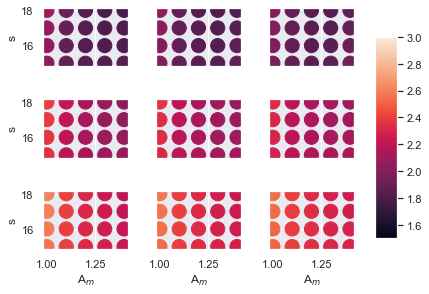

In [31]:
fig, axs = plt.subplots(P_h_length, r_length)
cm = plt.cm.get_cmap('RdYlBu')
for i in range(r_length):
    print(i)
    key = keys[i]
    for j in range(P_h_length):
        ax = axs[j, i].scatter(df_dict[key[j]].Am, df_dict[key[j]].s, s=200, c=df_dict[key[j]].peak_T, vmin=1.5, vmax=3)

fig.tight_layout()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ax, cax=cbar_ax)
for ax in axs.flat:
    ax.set(xlabel='A$_{m}$', ylabel='s')
for ax in axs.flat:
    ax.label_outer()


5 min 20 s for 180 runs

In [22]:
P_h_array

array([30, 60, 90])

In [28]:
df_dict['20,30']

,Am,s,peak_T
0,1.0,15,2.027943
1,1.0,16,2.046749
2,1.0,17,2.066236
3,1.0,18,2.086352
4,1.1,15,1.891496
5,1.1,16,1.896875
6,1.1,17,1.903003
7,1.1,18,1.909824
8,1.2,15,1.840963
9,1.2,16,1.838858
